<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Module F: Section 20.1, 20.2, 20.3, 20.4

Danika Young

# Numerical Differentiation Problem Statement

Numerical differentiation is an essential technique for approximating derivatives when an **analytical expression** for the derivative is unavailable. It is widely used in engineering, physics, and machine learning applications where discrete data points must be used to estimate derivatives.


Differentiation is a mathematical operation that measures the rate of change of a function. Given a function $f(x)$, its derivative is defined as:

$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$

However, in numerical methods, we approximate this using **finite differences**, which involve small, discrete values of $h $ instead of a limit approaching zero.


### **Why is Numerical Differentiation Needed?**
1. **Analytical derivatives** may not always be available.
2. **Complex functions** such as real-world data points may lack explicit formulas.
3. **Computational simulations** often require discrete approximations.


### **Types of Finite Difference Approximations**
Finite difference methods estimate derivatives using discrete function values at specific points. The three primary types are:

1. **Forward Difference Approximation**
2. **Backward Difference Approximation**
3. **Central Difference Approximation**


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = e^x
def f(x):
    return np.exp(x)

# Exact derivative for comparison
def df_exact(x):
    return np.exp(x)

# Numerical differentiation using central difference
def central_difference(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

# Test at x = 1
x_test = 1
approx_derivative = central_difference(f, x_test, h=0.01)
exact_derivative = df_exact(x_test)

print(f"Approximate derivative at x = {x_test}: {approx_derivative}")
print(f"Exact derivative at x = {x_test}: {exact_derivative}")



Approximate derivative at x = 1: 2.718327133382714
Exact derivative at x = 1: 2.718281828459045


In [3]:
# Define a polynomial function f(x) = x^3 + 2x^2 + 4x + 5
def f(x):
    return x**3 + 2*x**2 + 4*x + 5

# Exact derivative f'(x) = 3x^2 + 4x + 4
def df_exact(x):
    return 3*x**2 + 4*x + 4

# Test at x = 2
x_test = 2
approx_derivative = central_difference(f, x_test, h=0.01)
exact_derivative = df_exact(x_test)

print(f"Approximate derivative at x = {x_test}: {approx_derivative}")
print(f"Exact derivative at x = {x_test}: {exact_derivative}")


Approximate derivative at x = 2: 24.00009999999959
Exact derivative at x = 2: 24


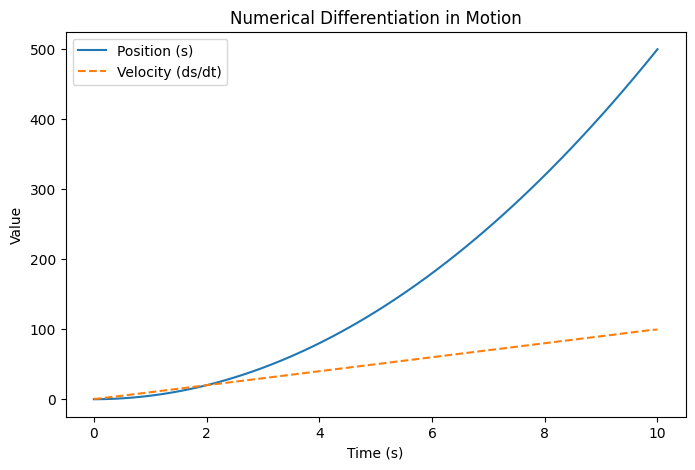

In [4]:
# Simulating position-time data for an object moving
time = np.linspace(0, 10, 100)  # Time from 0 to 10 seconds
position = 5 * time**2  # Example motion: s = 5t^2 (Quadratic motion)

# Compute velocity using numerical differentiation
velocity = np.gradient(position, time)

# Plot position and velocity
plt.figure(figsize=(8,5))
plt.plot(time, position, label="Position (s)")
plt.plot(time, velocity, label="Velocity (ds/dt)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Numerical Differentiation in Motion")
plt.legend()
plt.show()


# Finite Difference Approximating Derivatives

Finite difference methods use small **step sizes** $ h $ to approximate derivatives.


### **1. Forward Difference Approximation**
This method estimates the derivative using the function value at $x + h $:

$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$

This is a **first-order approximation** and introduces an error term proportional to \( h \).

### **2. Backward Difference Approximation**
Instead of looking forward, this method uses the function value at $ x - h $:

$
f'(x) \approx \frac{f(x) - f(x-h)}{h}
$

This is also a first-order approximation.

### **3. Central Difference Approximation**
A more accurate alternative that uses both forward and backward values:

$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$

This method is a **second-order approximation**, meaning it has a smaller error than forward or backward differences.


In [5]:
# Finite Difference Approximations
def forward_difference(f, x, h=0.01):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h=0.01):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

# Testing at x = π/4
x_test = np.pi / 4
h_values = [0.1, 0.01, 0.001]

print(f"Exact derivative at x = {x_test}: {df_exact(x_test)}")

for h in h_values:
    print(f"h = {h}")
    print(f" Forward Difference: {forward_difference(f, x_test, h)}")
    print(f" Backward Difference: {backward_difference(f, x_test, h)}")
    print(f" Central Difference: {central_difference(f, x_test, h)}")
    print()


Exact derivative at x = 0.7853981633974483: 8.992143478794048
h = 0.1
 Forward Difference: 9.437762927813278
 Backward Difference: 8.566524029774811
 Central Difference: 9.002143478794045

h = 0.01
 Forward Difference: 9.03580542369582
 Backward Difference: 8.948681533892255
 Central Difference: 8.992243478794038

h = 0.001
 Forward Difference: 8.996500673283947
 Backward Difference: 8.987788284304798
 Central Difference: 8.992144478794373



# Approximating of Higher Order Derivatives


Higher-order derivatives measure **curvature** and **rate of change of the derivative**.

### **1. Second-Order Derivative (Curvature)**
The second derivative represents the **rate of change of the first derivative**:

$
f''(x) = \lim_{h \to 0} \frac{f'(x+h) - f'(x-h)}{2h}
$

A more accurate central difference formula:

$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$





The accuracy of finite difference methods depends on:
- **Step size \( h \)**: A small \( h \) improves accuracy but increases numerical errors.
- **Order of approximation**: Central differences are generally more accurate than forward/backward differences.

### **Comparison of Methods**
| Method        | Formula | Order of Accuracy |
|--------------|--------------------------------|----------------|
| Forward Difference  | $ f'(x) \approx \frac{f(x+h) - f(x)}{h} $ | First Order |
| Backward Difference | $f'(x) \approx \frac{f(x) - f(x-h)}{h} $ | First Order |
| Central Difference  | $f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $| Second Order |
| Second Derivative   | $f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $ | Second Order |

---


In [6]:
# Second-Order Derivative Approximation
def second_derivative(f, x, h=0.01):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Testing second derivative
print(f"Second derivative at x = {x_test}: {second_derivative(f, x_test, 0.01)}")


Second derivative at x = 0.7853981633974483: 8.712388980356423


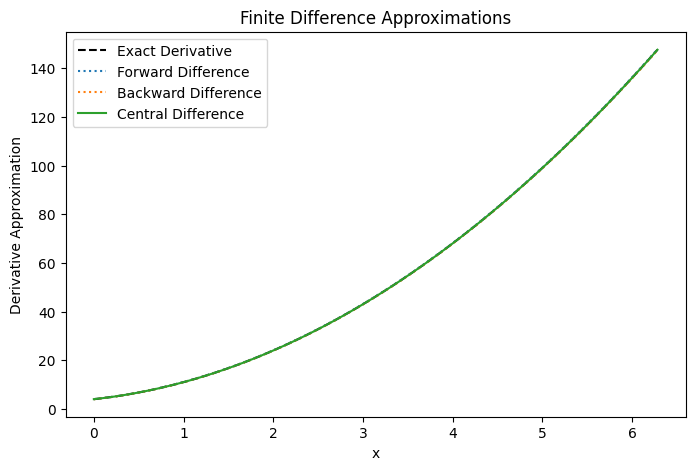

In [7]:
# Generate data for plotting
x_values = np.linspace(0, 2 * np.pi, 100)
exact_values = df_exact(x_values)
forward_values = [forward_difference(f, x, 0.01) for x in x_values]
backward_values = [backward_difference(f, x, 0.01) for x in x_values]
central_values = [central_difference(f, x, 0.01) for x in x_values]

# Plot derivatives
plt.figure(figsize=(8,5))
plt.plot(x_values, exact_values, label="Exact Derivative", linestyle="dashed", color="black")
plt.plot(x_values, forward_values, label="Forward Difference", linestyle="dotted")
plt.plot(x_values, backward_values, label="Backward Difference", linestyle="dotted")
plt.plot(x_values, central_values, label="Central Difference", linestyle="solid")

plt.xlabel("x")
plt.ylabel("Derivative Approximation")
plt.title("Finite Difference Approximations")
plt.legend()
plt.show()
